In [1]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import yfinance as yf

%matplotlib inline

In [2]:
start = "2010-01-01"
end = '2020-12-31'
aapl = yf.download('AAPL',start,end)
msft = yf.download('MSFT',start,end)
tsla = yf.download('TSLA',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.452590,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564354,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459941,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447998,477131200


In [4]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2009-12-31 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2769 non-null   float64
 1   High       2769 non-null   float64
 2   Low        2769 non-null   float64
 3   Close      2769 non-null   float64
 4   Adj Close  2769 non-null   float64
 5   Volume     2769 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.4 KB


In [5]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.980000,30.990000,30.480000,30.480000,23.541971,31929700
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.904980,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.912706,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.765955,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.518795,50559700


In [6]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2009-12-31 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2769 non-null   float64
 1   High       2769 non-null   float64
 2   Low        2769 non-null   float64
 3   Close      2769 non-null   float64
 4   Adj Close  2769 non-null   float64
 5   Volume     2769 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.4 KB


In [7]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [8]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2646 entries, 2010-06-29 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2646 non-null   float64
 1   High       2646 non-null   float64
 2   Low        2646 non-null   float64
 3   Close      2646 non-null   float64
 4   Adj Close  2646 non-null   float64
 5   Volume     2646 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 144.7 KB


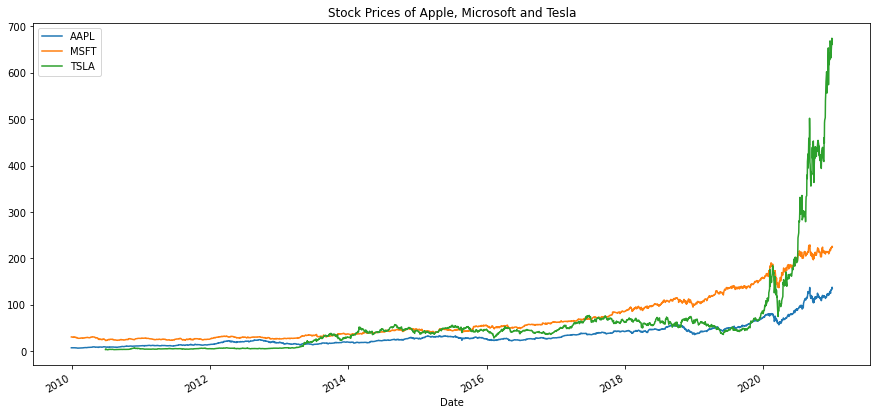

In [9]:
aapl['Open'].plot(label = 'AAPL', figsize = (15,7))
msft['Open'].plot(label = "MSFT")
tsla['Open'].plot(label = 'TSLA')
plt.title('Stock Prices of Apple, Microsoft and Tesla')
plt.legend()

The above graph is the representation of open stock prices for these three companies via line graph by leveraging matplotlib library in python. The Graph clearly shows that the prices of Wipro is more when comparing it to other two companies but we are not interested in the absolute prices for these companies but wanted to understand how these stock fluctuate with time.

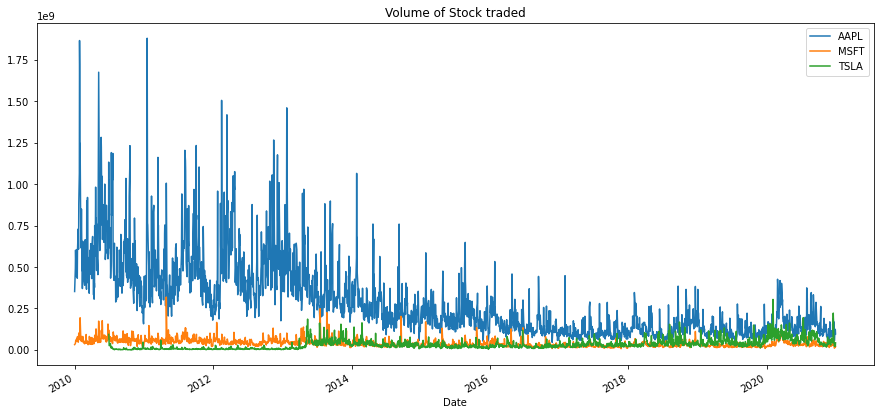

In [10]:
aapl['Volume'].plot(label = 'AAPL', figsize = (15,7))
msft['Volume'].plot(label = "MSFT")
tsla['Volume'].plot(label = 'TSLA')
plt.title('Volume of Stock traded')
plt.legend()

The Graph shows the volume traded by these companies which clearly shows that stocks of Apple are traded more compared to other IT stocks.

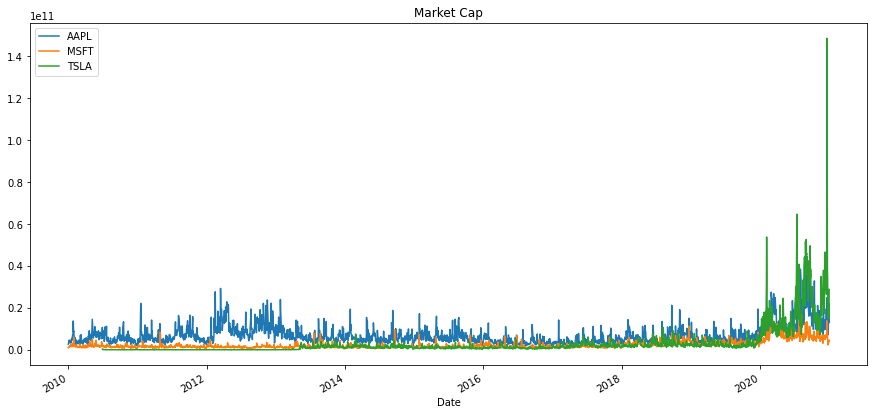

In [13]:
#Market Capitalisation
aapl['MarktCap'] = aapl['Open'] * aapl['Volume']
msft['MarktCap'] = msft['Open'] * msft['Volume']
tsla['MarktCap'] = tsla['Open'] * tsla['Volume']

aapl['MarktCap'].plot(label = 'AAPL', figsize = (15,7))
msft['MarktCap'].plot(label = 'MSFT')
tsla['MarktCap'].plot(label = 'TSLA')
plt.title('Market Cap')
plt.legend()

Only volume or stock prices do not provide a comparison between companies. In this case, we have plotted a graph for Volume * Share price to better compare the companies. As we can clearly see from the graph that Apple seems to be traded on a higher side in early years. And then Tesla is above others.

In [14]:
#Moving Averages
aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()

As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average

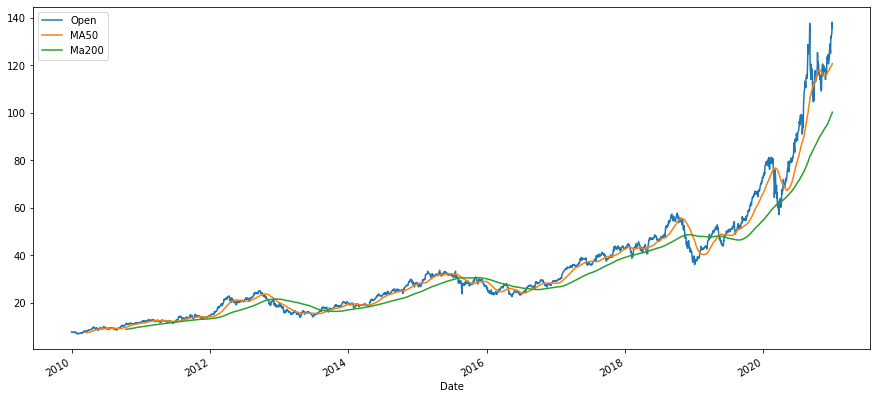

In [16]:
aapl['Open'].plot(figsize = (15,7))
aapl['MA50'].plot(label='MA50')
aapl['MA200'].plot(label='Ma200')
plt.legend()

In [32]:
def moving_averages(comp):
    comp['MA50'] = comp['Open'].rolling(50).mean()
    comp['MA200'] = comp['Open'].rolling(200).mean()
    comp['Open'].plot(figsize = (15,7))
    comp['MA50'].plot(label='MA50')
    comp['MA200'].plot(label='Ma200')
    plt.legend()
    return plt.show()

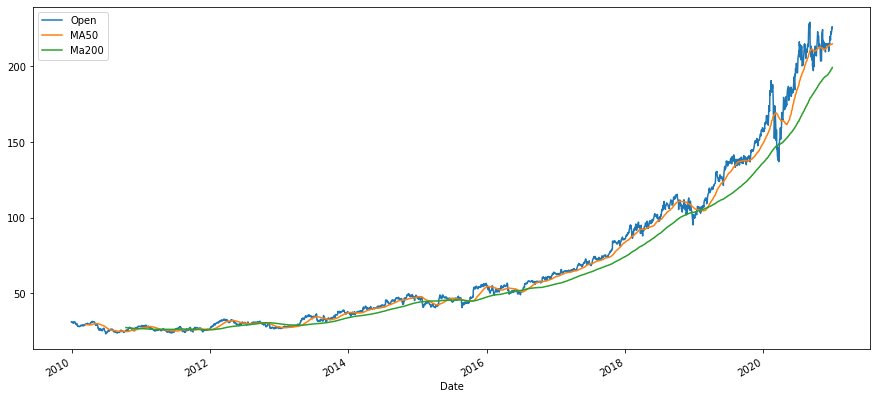

In [33]:
moving_averages(msft)

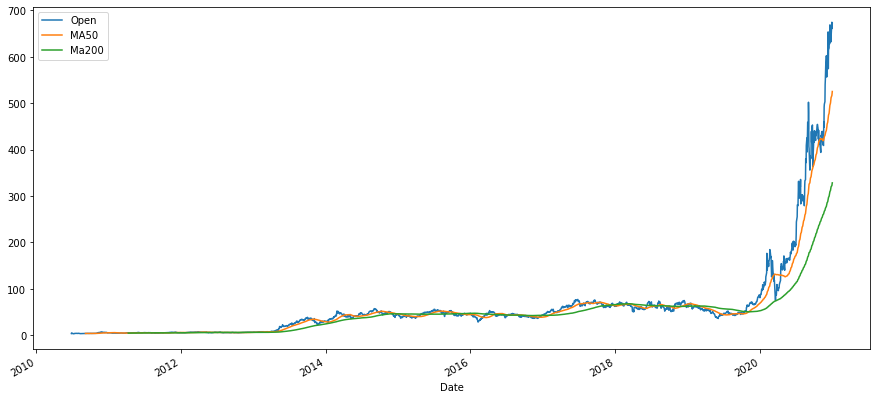

In [34]:
moving_averages(tsla)

The above is a ten years chart of Tesla Stock and Microsoft Stock with simple moving averages. The orange line is the shorter, 50-day moving average. Most traders will use the cross of the short-term moving average above the longer-term moving average to initiate a long position and identify the start of a bullish trend. As we can see there is a growing trend.

In [36]:
aapl['Shares'] = [1 if aapl.loc[ei, 'MA50']>aapl.loc[ei, 'MA200'] else 0 for ei in aapl.index]
msft['Shares'] = [1 if msft.loc[ei, 'MA50']>msft.loc[ei, 'MA200'] else 0 for ei in msft.index]
tsla['Shares'] = [1 if tsla.loc[ei, 'MA50']>tsla.loc[ei, 'MA200'] else 0 for ei in tsla.index]

Calculating Profit

The profit is calculated as the close price of (tomorrow - the close price of today) Otherwise the profit is 0.

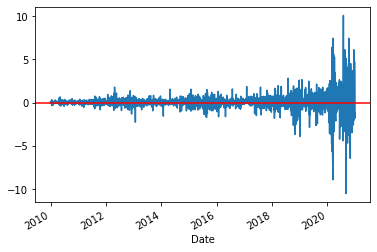

In [38]:
aapl['Close1'] = aapl['Close'].shift(-1)
aapl['Profit'] = [aapl.loc[ei, 'Close1'] - aapl.loc[ei, 'Close'] for ei in aapl.index]
aapl['Profit'].plot()
plt.axhline(y=0, color='red')

In [39]:
def profit(comp):
    comp['Close1'] = comp['Close'].shift(-1)
    comp['Profit'] = [comp.loc[ei, 'Close1'] - comp.loc[ei, 'Close'] for ei in comp.index]
    comp['Profit'].plot()
    plt.axhline(y=0, color='red')

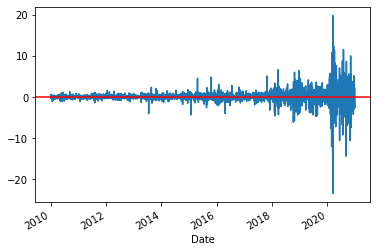

In [40]:
profit(msft)

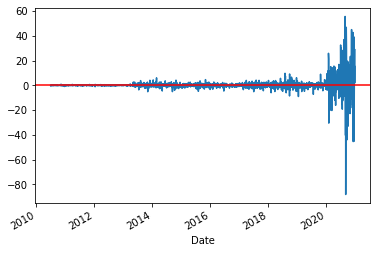

In [41]:
profit(tsla)

What would happen if we keep our investment:

In [43]:
def wealth_func(data):
    data['wealth'] = data['Profit'].cumsum()
    data['wealth'].plot()
    plt.title('Total money you have made: {}'.format(data.loc[data.index[-2], 'wealth']))

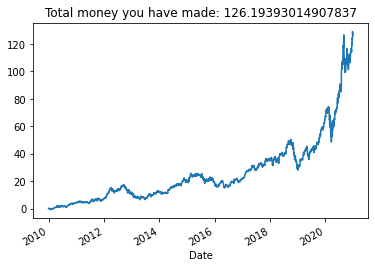

In [44]:
wealth_func(aapl)

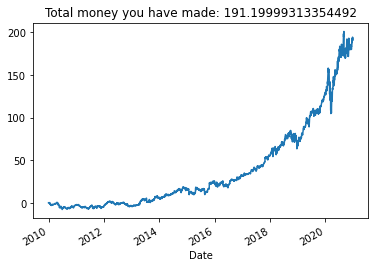

In [45]:
wealth_func(msft)

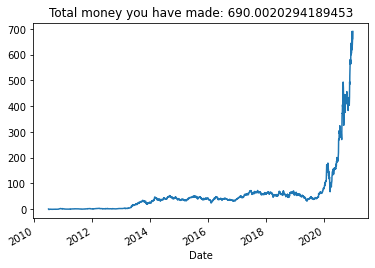

In [46]:
wealth_func(tsla)

As we can see our strategy gave as the possibility to made good money during all of these years

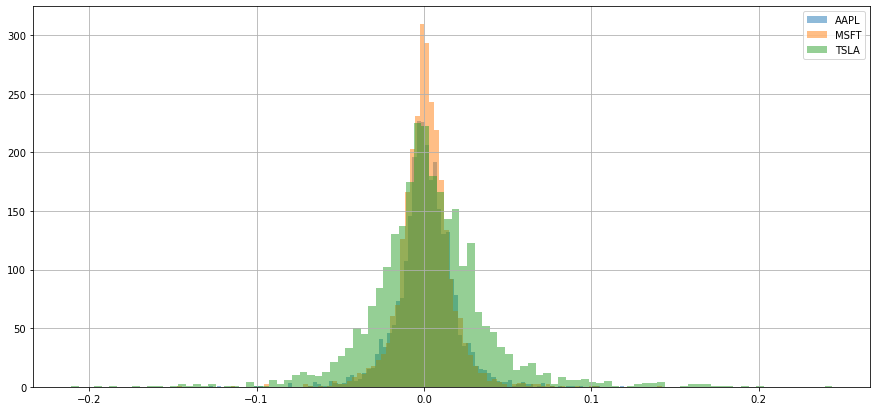

In [47]:
#Volatility
aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
msft['returns'] = (msft['Close']/msft['Close'].shift(1))-1
tsla['returns'] = (tsla['Close']/tsla['Close'].shift(1)) - 1
aapl['returns'].hist(bins = 100, label = 'AAPL', alpha = 0.5, figsize = (15,7))
msft['returns'].hist(bins = 100, label = 'MSFT', alpha = 0.5)
tsla['returns'].hist(bins = 100, label = 'TSLA', alpha = 0.5)
plt.legend()

It is clear from the graph that the percentage increase in stock price histogram for Tesla is the widest which indicates the stock of TCS is the most volatile among the three companies compared.

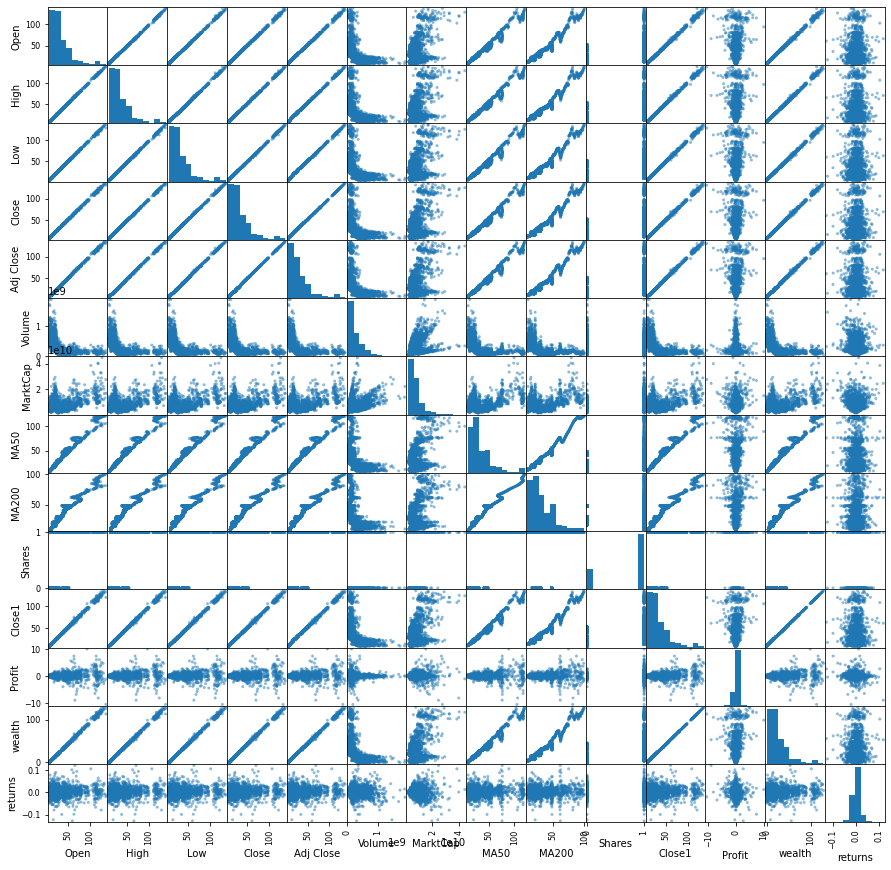

In [48]:
#Building our trading model

from pandas.plotting import scatter_matrix
sm = scatter_matrix(aapl, figsize=(15, 15))

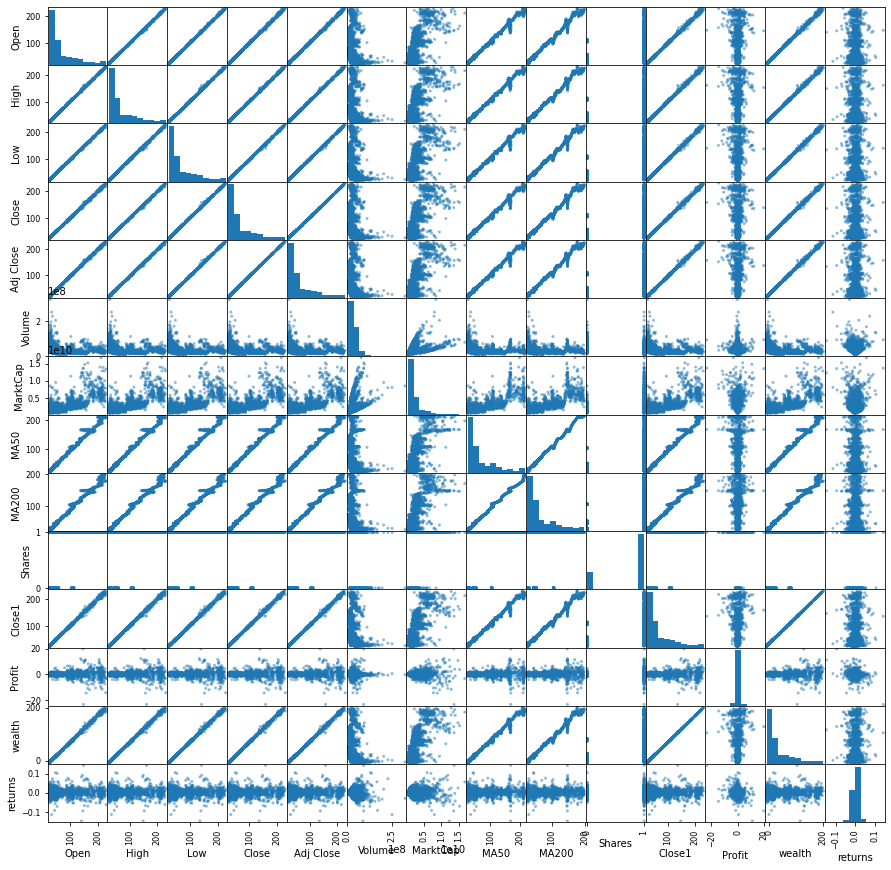

In [49]:
#Building our trading model

from pandas.plotting import scatter_matrix
sm = scatter_matrix(msft, figsize=(15, 15))